# Import Libraray

In [1]:
import numpy as np
import keras 
from keras.datasets import mnist
from keras.models import Model
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Import Dataset:

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
print(x_train.shape,y_train.shape),(y_train)

(60000, 28, 28) (60000,)


(None, array([5, 0, 4, ..., 5, 6, 8], dtype=uint8))

In [4]:
print(x_test.shape,y_test.shape),y_test

(10000, 28, 28) (10000,)


(None, array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

# Display Sample image

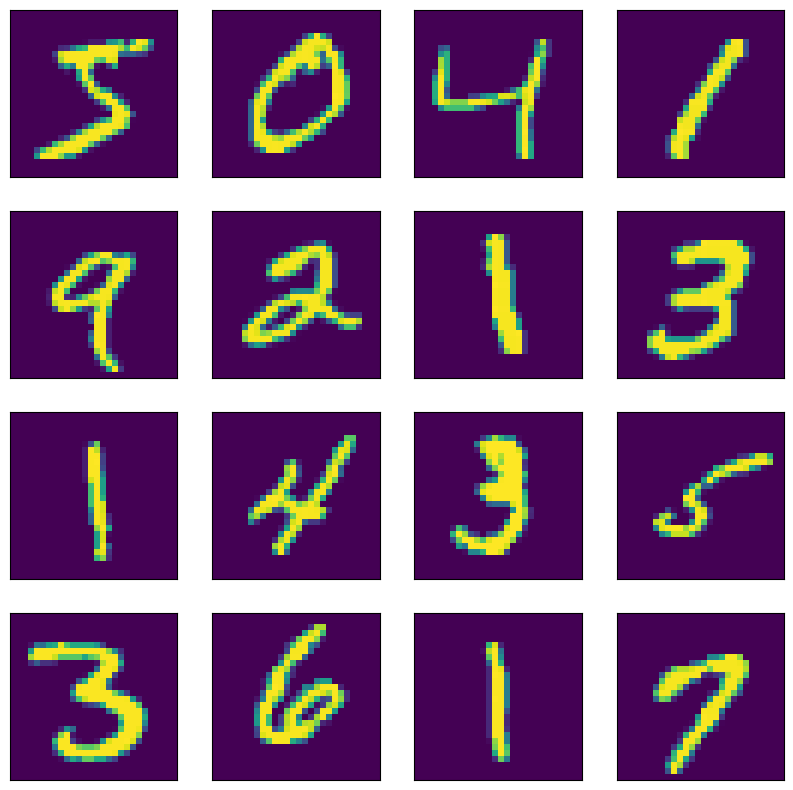

In [5]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    #plt.grid(False)
    plt.imshow(x_train[i])
plt.show()

# create model

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

# model summary

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 1152)              0

# compiler

In [8]:
model.compile(optimizer='adam',
 loss="sparse_categorical_crossentropy",
 metrics=['accuracy'])

# Train and Test the model.

In [9]:
epochs=10
history = model.fit(x_train, y_train,
                    validation_data=(x_test,y_test),
                    epochs=epochs,batch_size=64
                   )

Epoch 1/10
938/938 [==============================] - 8s 5ms/step - loss: 0.3933 - accuracy: 0.9033 - val_loss: 0.0672 - val_accuracy: 0.9787
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0834 - accuracy: 0.9771 - val_loss: 0.0457 - val_accuracy: 0.9870
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0569 - accuracy: 0.9837 - val_loss: 0.0419 - val_accuracy: 0.9893
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0458 - accuracy: 0.9865 - val_loss: 0.0523 - val_accuracy: 0.9867
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0406 - accuracy: 0.9875 - val_loss: 0.0417 - val_accuracy: 0.9879
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0373 - accuracy: 0.9898 - val_loss: 0.0480 - val_accuracy: 0.9848
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0308 - accuracy: 0.9912 - val_loss: 0.0375 - val_accuracy: 0.9891
Epoch 

# Evaluation

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: ",test_loss*100)
print("Test Accuracy: ", test_acc*100)

313/313 [==============================] - 1s 2ms/step - loss: 0.0485 - accuracy: 0.9893
Test Loss:  4.851832240819931
Test Accuracy:  98.9300012588501


In [11]:
loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

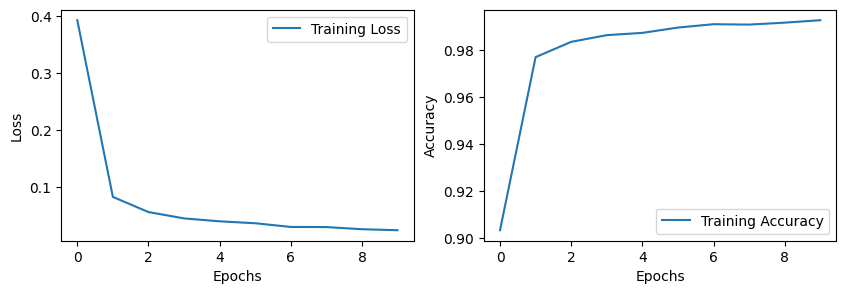

In [12]:
# Create subplots for loss and accuracy
plt.figure(figsize=(10, 3))
# Loss subplot
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy subplot
plt.subplot(1, 2, 2)
plt.plot(acc, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

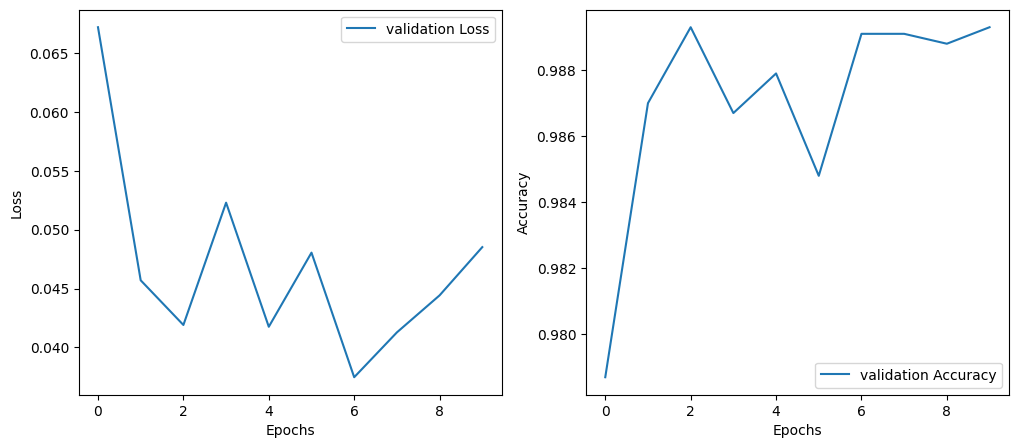

In [13]:
# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))
# Loss subplot
plt.subplot(1, 2, 1)
plt.plot(val_loss, label='validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy subplot
plt.subplot(1, 2, 2)
plt.plot(val_acc, label='validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

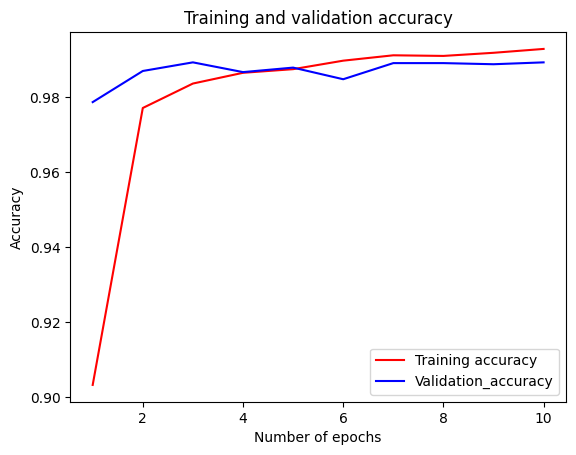

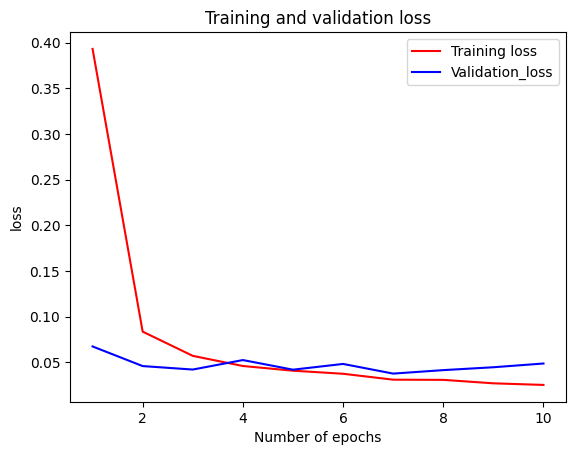

In [14]:
epo=range(1,len(acc)+1)

plt.title('Training and validation accuracy')
plt.plot(epo,acc,'red',label='Training accuracy')
plt.xlabel('Number of epochs')
plt.ylabel("Accuracy")
plt.plot(epo,val_acc,'blue',label='Validation_accuracy')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epo,loss,'red',label='Training loss')
plt.xlabel('Number of epochs')
plt.ylabel("loss")
plt.plot(epo,val_loss,'blue',label='Validation_loss')
plt.legend()

plt.show()

# prediction

In [15]:
y_pred = model.predict(x_test)
y_pred_cl = np.argmax(y_pred, axis=1)
y_pred_cl

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

# Confusion Matrix

In [16]:
cm = confusion_matrix(y_test,y_pred_cl)
cm

array([[ 976,    1,    0,    0,    1,    0,    0,    2,    0,    0],
       [   0, 1130,    0,    3,    1,    0,    0,    1,    0,    0],
       [   0,    1, 1025,    0,    0,    0,    0,    6,    0,    0],
       [   0,    0,    0, 1000,    0,    5,    0,    4,    1,    0],
       [   0,    0,    0,    0,  977,    0,    1,    1,    0,    3],
       [   1,    0,    0,    8,    0,  881,    2,    0,    0,    0],
       [   2,    6,    0,    0,    4,    3,  943,    0,    0,    0],
       [   0,    4,    2,    1,    0,    0,    0, 1020,    0,    1],
       [   3,    1,    1,    3,    1,    2,    0,    1,  960,    2],
       [   0,    0,    0,    1,    7,    4,    0,   10,    6,  981]])

# Heatmap

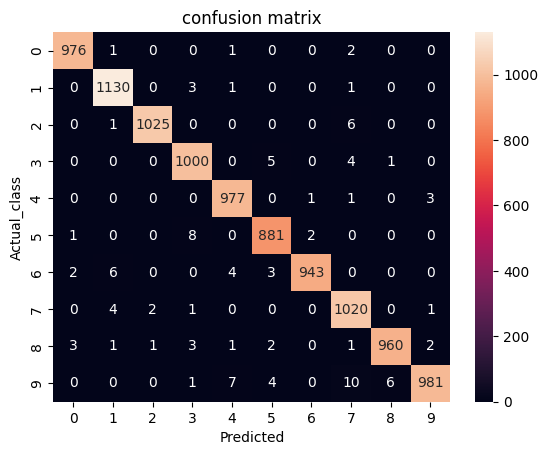

In [17]:
sns.heatmap(confusion_matrix(y_test,y_pred_cl),annot=True,fmt='d')
plt.title("confusion matrix")
plt.xlabel("Predicted")
plt.ylabel('Actual_class')
plt.show()

# classification report

In [18]:
clss_report=classification_report(y_test,y_pred_cl)
print(clss_report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.99      1.00      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# Let's make predictions on the test test and check whether those predictions are correct or not

In [19]:
x_predict=model.predict(x_test)[2].argmax()
print("prediction:",x_predict)

313/313 [==============================] - 1s 2ms/step
prediction: 1


Actual: 1
AxesImage(size=(28, 28))


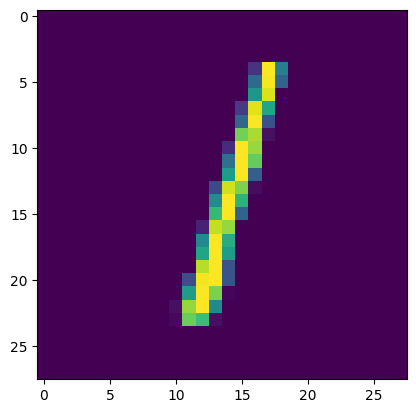

In [20]:
print("Actual:",y_test[2])
print(plt.imshow(x_test[2]))

313/313 [==============================] - 1s 2ms/step
Actual: 7
Actual: 2
Actual: 1
Actual: 0
Actual: 4
Actual: 1
Actual: 4
Actual: 9
Actual: 5
Actual: 9
Actual: 0
Actual: 6
Actual: 9
Actual: 0
Actual: 1
Actual: 5


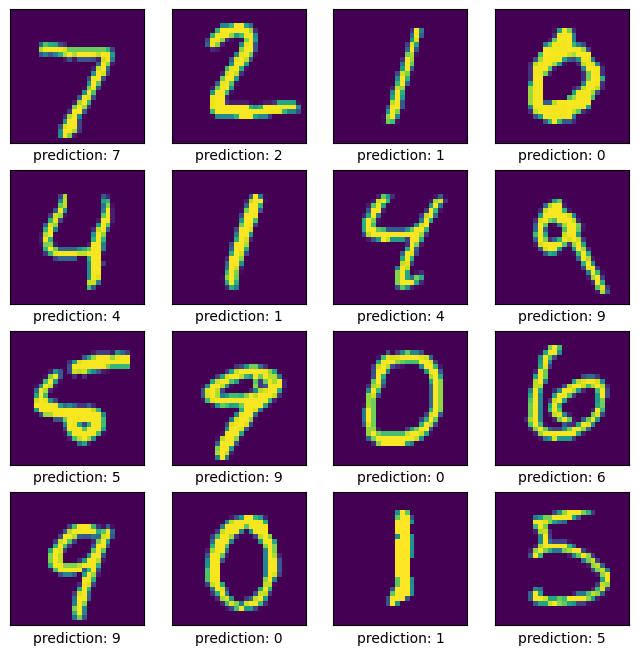

In [21]:
predictions = model.predict(x_test)
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    prediction = predictions[i].argmax()
    plt.xlabel('prediction: '+str(prediction))
    print("Actual:",y_test[i])
    image =plt.imshow(x_test[i])
    plt.xticks([])  # Hide the x-axis scale and ticks
    plt.yticks([])  # Hide the y-axis scale and ticks
    

# Model Save

In [22]:
model.save('Models/mnist_model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
